In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [41]:
df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

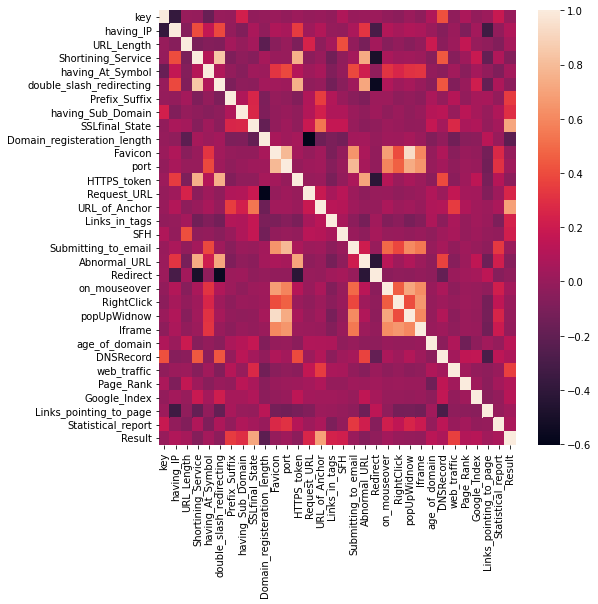

In [28]:
plt.figure(figsize =(8,8))
sns.heatmap(df.corr())

In [29]:
temp = df.corr()['Result'].sort_values()
temp

Domain_registeration_length   -0.219960
Shortining_Service            -0.066170
Abnormal_URL                  -0.059860
double_slash_redirecting      -0.037758
HTTPS_token                   -0.036573
Redirect                      -0.027197
Iframe                        -0.013429
Favicon                       -0.003260
popUpWidnow                   -0.002868
key                           -0.000854
RightClick                     0.004880
Submitting_to_email            0.011981
port                           0.033971
Links_pointing_to_page         0.035003
on_mouseover                   0.042180
having_At_Symbol               0.050045
URL_Length                     0.059331
Statistical_report             0.068015
DNSRecord                      0.081927
having_IP                      0.094027
Page_Rank                      0.102920
Google_Index                   0.121896
age_of_domain                  0.135198
SFH                            0.217931
Links_in_tags                  0.238802


In [30]:
temp=str(temp)
temp = temp.split('\n')
eliminated = []
values = [temp[i].split()[1].strip() for i in range(len(temp))]


In [31]:
values

['-0.219960',
 '-0.066170',
 '-0.059860',
 '-0.037758',
 '-0.036573',
 '-0.027197',
 '-0.013429',
 '-0.003260',
 '-0.002868',
 '-0.000854',
 '0.004880',
 '0.011981',
 '0.033971',
 '0.035003',
 '0.042180',
 '0.050045',
 '0.059331',
 '0.068015',
 '0.081927',
 '0.094027',
 '0.102920',
 '0.121896',
 '0.135198',
 '0.217931',
 '0.238802',
 '0.254572',
 '0.296728',
 '0.344660',
 '0.355581',
 '0.696394',
 '0.712543',
 '1.000000',
 'Result,']

In [32]:
temp.pop()

'Name: Result, dtype: float64'

In [33]:
temp

['Domain_registeration_length   -0.219960',
 'Shortining_Service            -0.066170',
 'Abnormal_URL                  -0.059860',
 'double_slash_redirecting      -0.037758',
 'HTTPS_token                   -0.036573',
 'Redirect                      -0.027197',
 'Iframe                        -0.013429',
 'Favicon                       -0.003260',
 'popUpWidnow                   -0.002868',
 'key                           -0.000854',
 'RightClick                     0.004880',
 'Submitting_to_email            0.011981',
 'port                           0.033971',
 'Links_pointing_to_page         0.035003',
 'on_mouseover                   0.042180',
 'having_At_Symbol               0.050045',
 'URL_Length                     0.059331',
 'Statistical_report             0.068015',
 'DNSRecord                      0.081927',
 'having_IP                      0.094027',
 'Page_Rank                      0.102920',
 'Google_Index                   0.121896',
 'age_of_domain                 

In [35]:
for i in range(len(temp)):
  val = temp[i].split()[1].strip()
 
  if float(val)<0.1 and float(val)>-0.1:
    eliminated.append(temp[i].split()[0])
eliminated

['Shortining_Service',
 'Abnormal_URL',
 'double_slash_redirecting',
 'HTTPS_token',
 'Redirect',
 'Iframe',
 'Favicon',
 'popUpWidnow',
 'key',
 'RightClick',
 'Submitting_to_email',
 'port',
 'Links_pointing_to_page',
 'on_mouseover',
 'having_At_Symbol',
 'URL_Length',
 'Statistical_report',
 'DNSRecord',
 'having_IP']

In [ ]:
all = str(df.corr()['Result'].sort_values())
all = all.split('\n')
all.pop()
n_imp =[]
for i in range(len(all)):
  if (float(all[i].split()[1].strip())<0.1):
    n_imp.append(all[i].split()[0])



In [36]:
df.drop(eliminated,axis=1,inplace=True)
dftest.drop(eliminated,axis=1,inplace=True)

In [37]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]
Xtrain, ytrain = df.drop("Result",1), df["Result"]
Xtest = dftest
model = DecisionTreeClassifier()

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(Xtrain,ytrain)
ypred = rfc.predict(Xtest)

In [40]:
dftest

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,age_of_domain,web_traffic,Page_Rank,Google_Index
0,1,-1,1,-1,1,0,0,1,1,1,1,-1
1,-1,0,-1,1,1,-1,-1,-1,-1,0,-1,-1
2,-1,0,0,-1,-1,-1,-1,-1,1,1,-1,1
3,-1,-1,-1,1,-1,-1,1,-1,1,1,-1,1
4,-1,1,1,-1,1,0,1,-1,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-1,1,1,1,-1,0,0,-1,1,1,-1,-1
2096,-1,1,1,-1,1,0,-1,0,-1,-1,1,1
2097,-1,-1,-1,1,1,-1,-1,-1,-1,0,-1,1
2098,-1,0,-1,-1,1,0,1,-1,1,-1,-1,1


In [42]:
dfres = pd.DataFrame()
dfres['key']=dftest['key']
dfres['Result']=ypred


In [43]:
len(df.columns)

32

In [45]:
dfres.to_csv('final.csv',index=None)